In [1]:
%load_ext autoreload
%autoreload 2
#%matplotlib notebook
%matplotlib inline
#%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../') if '../' not in sys.path else None 
from methods import *
from plotting_functions import *

In [3]:
nx,ny = 1,1 # board size
res = 128

# initialize board
xx, yy = np.meshgrid(
    np.linspace(-nx/2, nx/2, res),
    np.linspace(-ny/2, ny/2, res),
)
board = np.stack([xx, yy], axis=-1)

# initialize grid module
f = 1
orientation_offset = 0
center = np.zeros(2)
add = True

#gridmodule = SquareGridModule(center,orientation_offset,f,non_negative=False,add=add)
gridmodule = GridModule(center,orientation_offset,f,non_negative=False,add=add)

In [4]:
#phases = gridmodule.inner_square.sample(3)
phases = gridmodule.inner_hexagon.sample(3)

phases = np.stack([np.array([0,0])] + [np.array([0.25/f, 0.25/f])] + [np.array([-0.25/f, 0.25/f])],axis=0)
gridmodule.init_module(phases)
ratemaps = gridmodule(board)

(-1.1, 1.1, -0.9526279441628829, 0.9526279441628827)

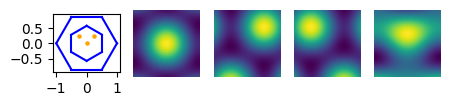

In [5]:
fig, axs = plot_samples_and_tiling(gridmodule, ratemaps, 3, figsize=(5,5))
axs[0].axis('on')

In [6]:
def contour_image(img,values,const=None,epsilon=0.05):
    if const == None:
        # contour line is 110% of highest value
        const = np.max(img)
        const += const*0.1
    masks = [(img>value-epsilon) & (img<value+epsilon) for value in values]
    img_cpy = np.copy(img)
    for mask in masks:
        img_cpy[mask] = const
    return img_cpy, np.sum(masks,axis=0)

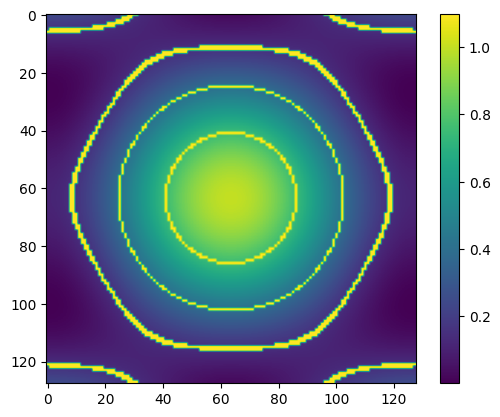

In [7]:
out,_ = contour_image(ratemaps[0],[0.15,0.4,0.75], epsilon=0.01)
plt.imshow(out)
plt.colorbar()

In [8]:
#contours = np.zeros_like(ratemaps[0])
contours = []
for ratemap in ratemaps:
    _,contour = contour_image(ratemap,[0.60, 0.40], epsilon=0.01)
    #contours += contour
    contours.append(contour)

(-0.5, 127.5, 127.5, -0.5)

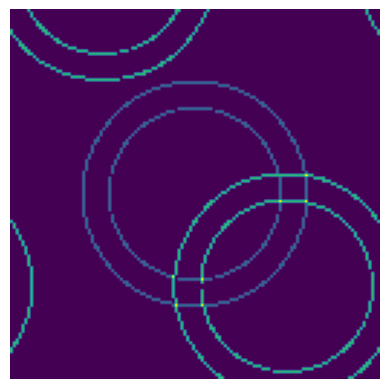

In [9]:
plt.imshow(contours[0] + contours[1]*2)
plt.axis('off')

(-0.5, 127.5, 127.5, -0.5)

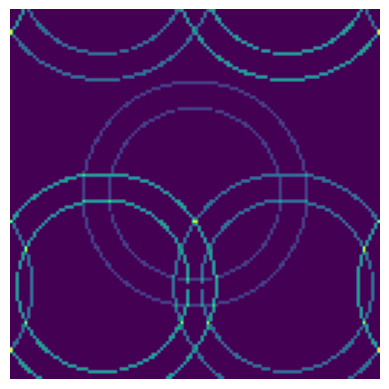

In [10]:
plt.imshow(contours[0] + contours[1]*2 + contours[2]*3)
plt.axis('off')

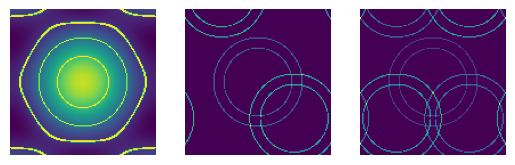

In [11]:
fig,axs = plt.subplots(ncols=3)
out,_ = contour_image(ratemaps[0],[0.15,0.4,0.75], epsilon=0.01)
axs[0].imshow(out)
axs[1].imshow(contours[0] + contours[1]*2)
axs[2].imshow(contours[0] + contours[1]*2 + contours[2]*3)
[ax.axis('off') for ax in axs]
fig.savefig('results/contour-lines-hexagon.png',bbox_inches='tight')